# In this i am creating shallow and advance CNN method for apple and tomato classification for tutorial.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import pandas as pd
import os

In [12]:
#Dataset Importating from my google drive
train_dir = '/content/drive/MyDrive/Tutorial/Dataset/train'
test_dir = '/content/drive/MyDrive/Tutorial/Dataset/test'


####  Resizing Image in same dimension

In [13]:
DIMENSIONS = [100, 100]

# Shallow CNN models

In [14]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras import backend
import tensorflow as tf
import keras

# shallow model
def simple_model():

    backend.clear_session()

    model = Sequential()

    # Adding convolution layers
    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', activation="relu", input_shape=(*DIMENSIONS, 3)))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform', activation="relu"))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform', activation="relu"))
    model.add(MaxPooling2D(2, 2))

    # Flattening/Dense layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu", kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

# Creating Deep CNN model

In [15]:
def advanced_model():
    backend.clear_session()
    model = Sequential()

    # Adding convolution layers
    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', input_shape=(*DIMENSIONS, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(2, 2))

    # Flattening the output and adding Dense layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

### Image Pipeline Generator

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.25,
      height_shift_range=0.25,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      brightness_range=(0.8, 1.2),
      fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=tuple(DIMENSIONS),
        class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
        test_dir,
        target_size=tuple(DIMENSIONS),
        class_mode='binary')

Found 80 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


###  Model training phase

In [20]:
# Select 1 at a time to execuate Shallow(Simple) and deep(advance)
model = simple_model()
#model = advanced_model()

# Parameters
BATCH_SIZE = 64
EPOCHS = 120

model.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,778,945 (25.86 MB)

 Trainable params: 6,778,945 (25.86 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr: lr if epoch < 60 else lr * float(tf.math.exp(-0.05)))], # Convert Tensor to float
    verbose=1)

Epoch 1/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7583 - loss: 0.4833 - val_accuracy: 0.6800 - val_loss: 0.7548 - learning_rate: 0.0010
Epoch 2/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 704ms/step - accuracy: 0.7432 - loss: 0.4415 - val_accuracy: 0.6800 - val_loss: 0.7305 - learning_rate: 0.0010
Epoch 3/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8047 - loss: 0.4402 - val_accuracy: 0.6400 - val_loss: 0.7462 - learning_rate: 0.0010
Epoch 4/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 711ms/step - accuracy: 0.7742 - loss: 0.4720 - val_accuracy: 0.5400 - val_loss: 0.9904 - learning_rate: 0.0010
Epoch 5/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 706ms/step - accuracy: 0.7312 - loss: 0.5779 - val_accuracy: 0.6200 - val_loss: 0.9609 - learning_rate: 0.0010
Epoch 6/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7927 - loss: 0.4409 - val_accuracy: 0.6000 - val_loss: 0.9042 - learning_rate: 0.0010
Epoch 7/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 825ms/step - accuracy: 0.7740 - loss: 0.4886 - val_accuracy: 0.

I was able to acheve 90% accuracy with both models on testing images.

Simple model consists of 3 convolution layers and 2 dense layers

Advanced model consists of 6 convolution layers normalizations and 2 very dense layers

I used data augmentation as well as dropout to prevent overfitting.

# Testing Results Shallow method

### Plotting Learning Curves

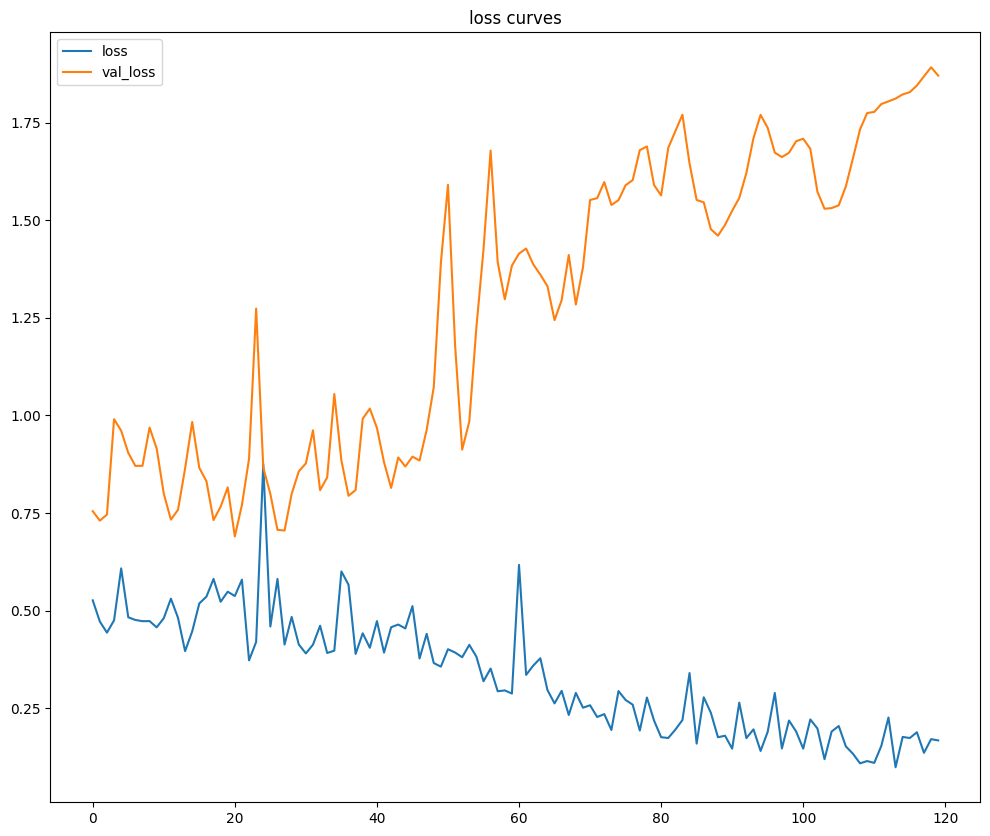

In [23]:
import matplotlib.pyplot as plt

# Plotting loss curves and validation loss curves
plt.figure(figsize=(12,10))
plt.title("loss curves")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

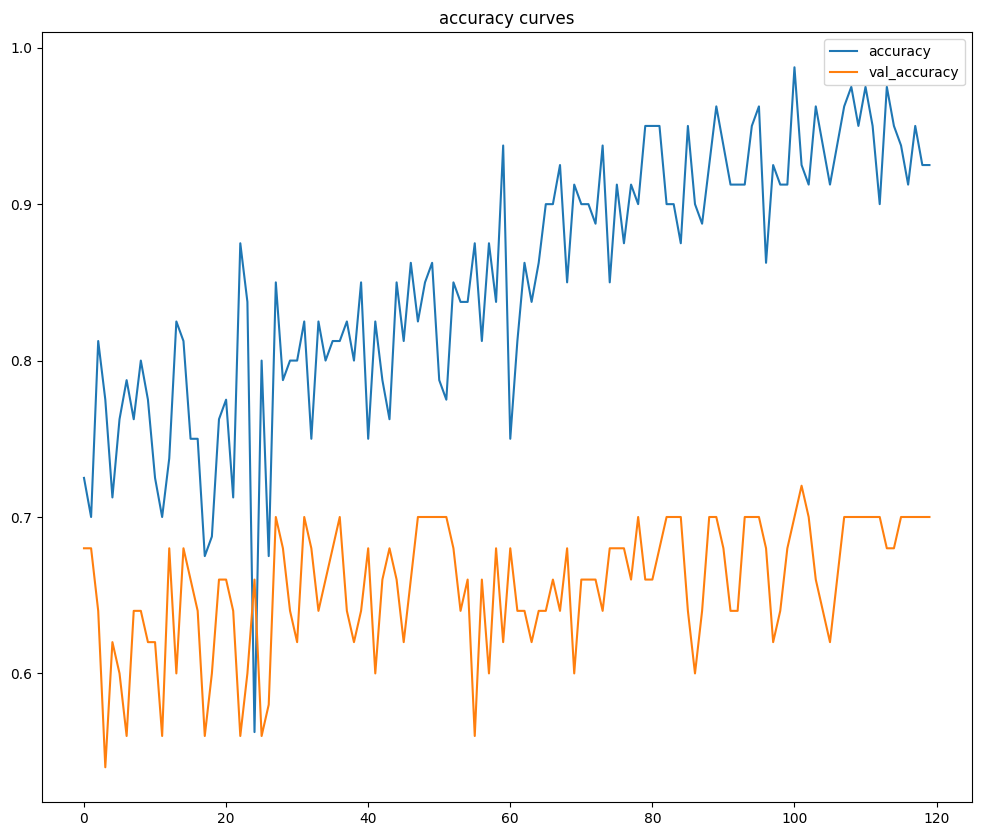

In [24]:
# Plotting accuracy curves
plt.figure(figsize=(12,10))
plt.title("accuracy curves")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

### Displaying Confusion Matrix

In [25]:
# Creating new generator for test data
test_generator = valid_datagen.flow_from_directory(
        test_dir,  # This is the source directory for test images
        target_size=(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
        shuffle=False)  # We don't want to shuffle the test data

# Predicting labels for all test images
y_pred = model.predict(test_generator)
y_pred[:10]

Found 50 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step


array([[9.9970597e-01],
       [9.0598136e-01],
       [7.0728185e-03],
       [6.4221613e-06],
       [7.1371120e-04],
       [1.6140960e-01],
       [9.8794907e-01],
       [4.7236237e-01],
       [3.1470387e-05],
       [5.7052761e-02]], dtype=float32)

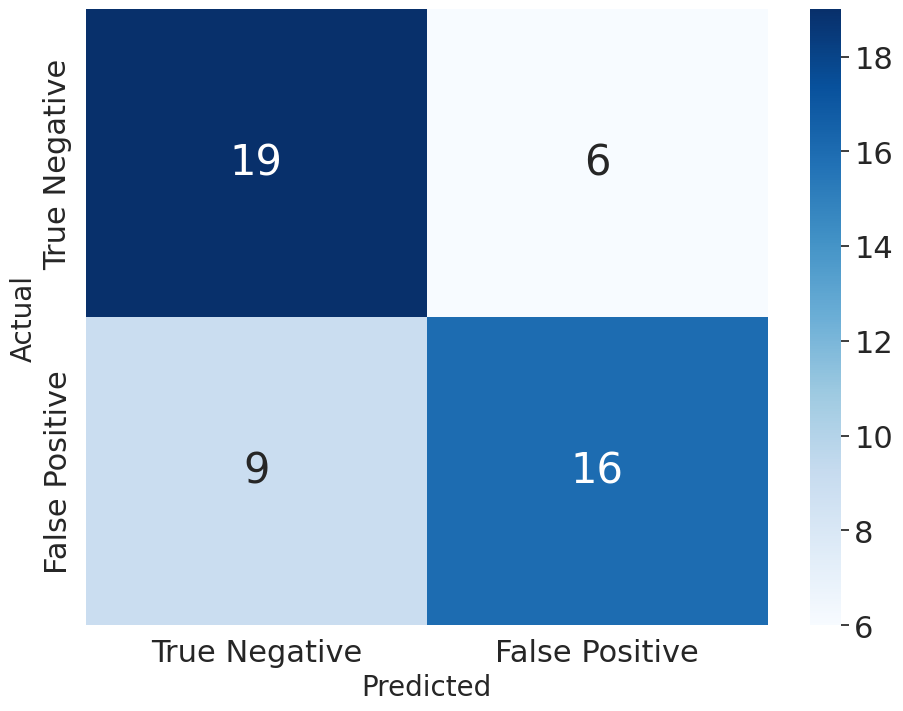

In [26]:
from sklearn.metrics import confusion_matrix

# True for test data
y_true = test_generator.labels

# predicted to binary labels
y_pred = np.round(y_pred)

# confusion matrix
confusion_matrix = confusion_matrix(y_true, y_pred)

# Displaying
import seaborn as sns
from seaborn import heatmap

plt.figure(figsize=(11,8))
sns.set(font_scale=2)

heatmap(confusion_matrix,
        annot=True,
        annot_kws={"size": 30},
        fmt='g',
        cmap='Blues',
        xticklabels=['True Negative', 'False Positive'],
        yticklabels=['True Negative', 'False Positive'])

plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

### wrongly classified images

In [27]:
# Getting indecies of wrongly classified images
misclassified_indices = np.where(y_true.reshape(-1,1) != y_pred)[0]

# Displaying all wrongly classified images
for i in misclassified_indices:
    image_path = test_generator.filepaths[i]
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

It is surprising that the model is incorrectly classifying red apples as tomatoes. One possible reason for this misclassification is that there may not be enough examples of red apples in the training dataset, leading the model to classify them as tomatoes instead. Another possibility is that the model is not able to accurately differentiate between red apples and tomatoes based on their visual features, which could be due to a lack of complexity in the model or a lack of diversity in the training data. It is also worth considering that the model may be correctly identifying the presence of a tomato, but incorrectly assigning the label of "apple" due to the lack of green tomatoes in the training data. To improve the model's performance, it may be helpful to gather more diverse training data and/or to try changing colors of images as data augmentation step.

In [28]:
# Select 1 at a time to execuate Shallow(Simple) and deep(advance)
#model = simple_model()
model = advanced_model()

# Parameters
BATCH_SIZE = 64
EPOCHS = 120

model.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 98, 98, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 47, 47, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 45, 45, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │              

 Total params: 4,753,409 (18.13 MB)

 Trainable params: 4,752,577 (18.13 MB)

 Non-trainable params: 832 (3.25 KB)

In [29]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr: lr if epoch < 60 else lr * float(tf.math.exp(-0.05)))], # Convert Tensor to float
    verbose=1)

Epoch 1/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4635 - loss: 2.0329 - val_accuracy: 0.5000 - val_loss: 1.0477 - learning_rate: 0.0010
Epoch 2/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5164 - loss: 2.8440 - val_accuracy: 0.5000 - val_loss: 1.0545 - learning_rate: 0.0010
Epoch 3/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4492 - loss: 3.3274 - val_accuracy: 0.5000 - val_loss: 3.5631 - learning_rate: 0.0010
Epoch 4/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7167 - loss: 0.9259 - val_accuracy: 0.5000 - val_loss: 3.2651 - learning_rate: 0.0010
Epoch 5/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6430 - loss: 1.9487 - val_accuracy: 0.4800 - val_loss: 2.8862 - learning_rate: 0.0010
Epoch 6/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.4510 - loss: 2.3078 - val_accuracy: 0.4800 - val_loss: 1.6445 - learning_rate: 0.0010
Epoch 7/120
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6031 - loss: 1.3867 - val_accuracy: 0.4800 - va

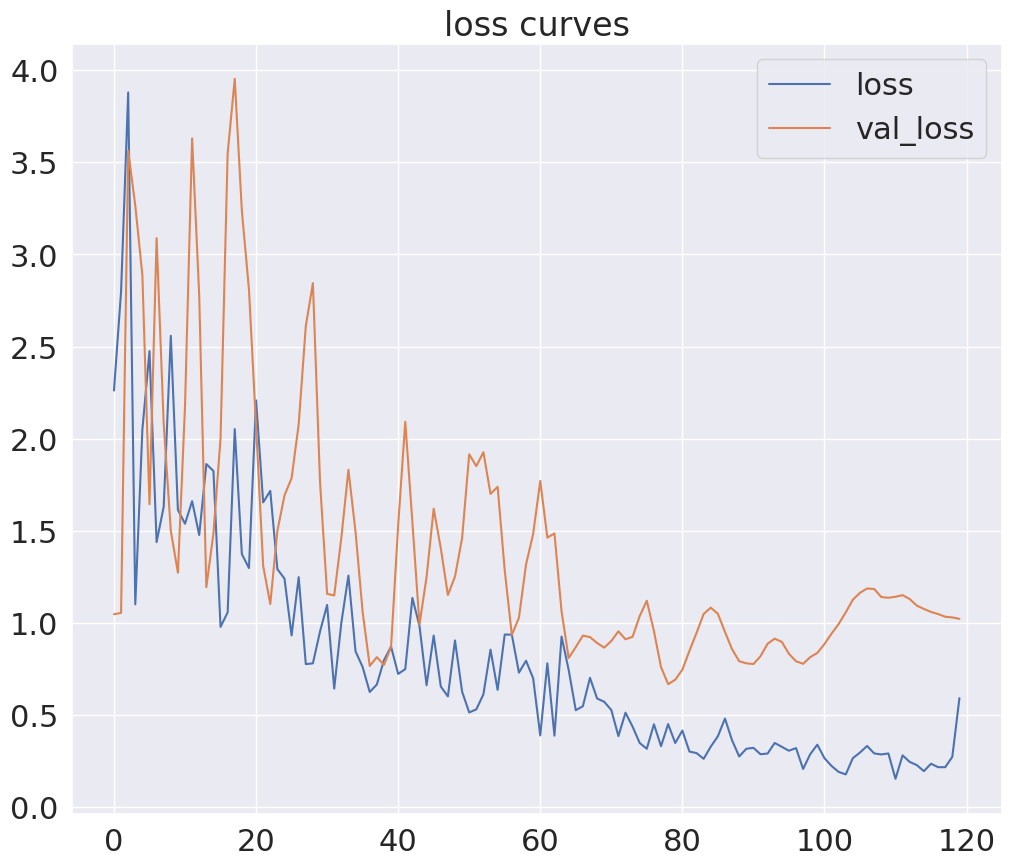

In [30]:
import matplotlib.pyplot as plt

# Plotting loss curves and validation loss curves
plt.figure(figsize=(12,10))
plt.title("loss curves")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

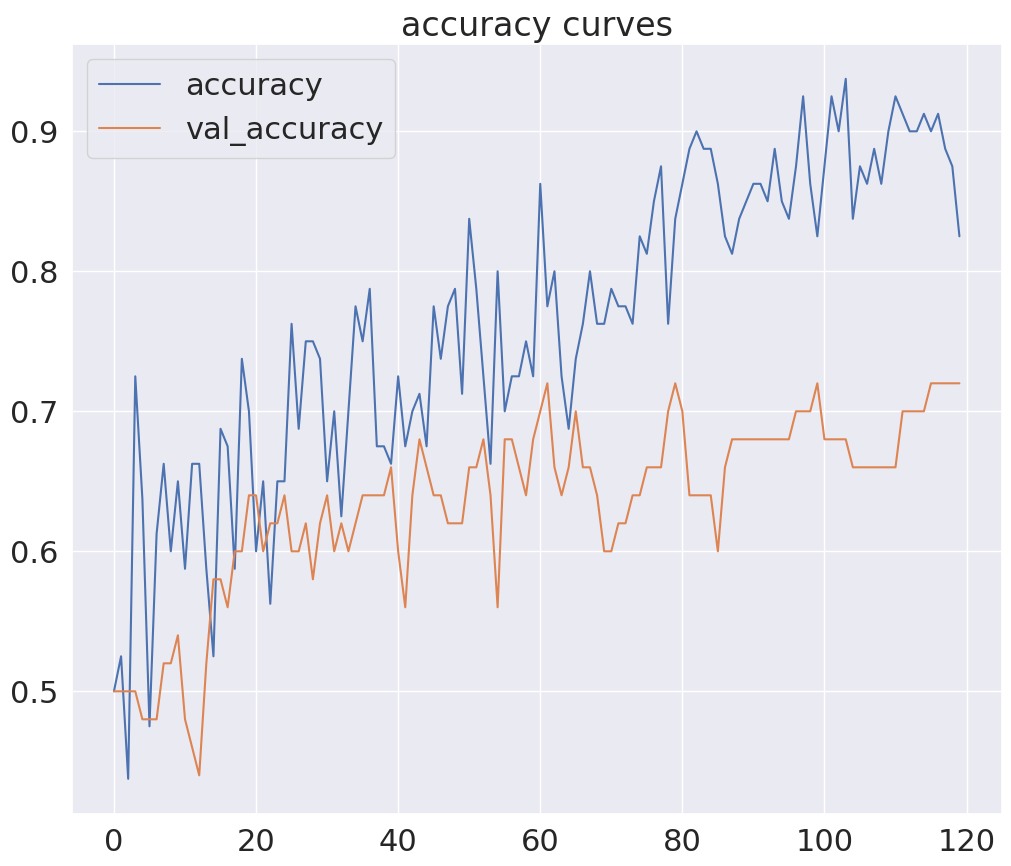

In [31]:
# Plotting accuracy curves
plt.figure(figsize=(12,10))
plt.title("accuracy curves")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [32]:
# Creating new generator for test data
test_generator = valid_datagen.flow_from_directory(
        test_dir,  # This is the source directory for test images
        target_size=(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
        shuffle=False)  # We don't want to shuffle the test data

# Predicting labels for all test images
y_pred = model.predict(test_generator)
y_pred[:10]

Found 50 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 384ms/step


array([[9.9999255e-01],
       [7.8579444e-01],
       [2.6468804e-01],
       [3.5759008e-01],
       [9.8295117e-05],
       [2.4816270e-03],
       [9.6341264e-01],
       [3.5735270e-01],
       [3.6736938e-01],
       [6.9782728e-01]], dtype=float32)

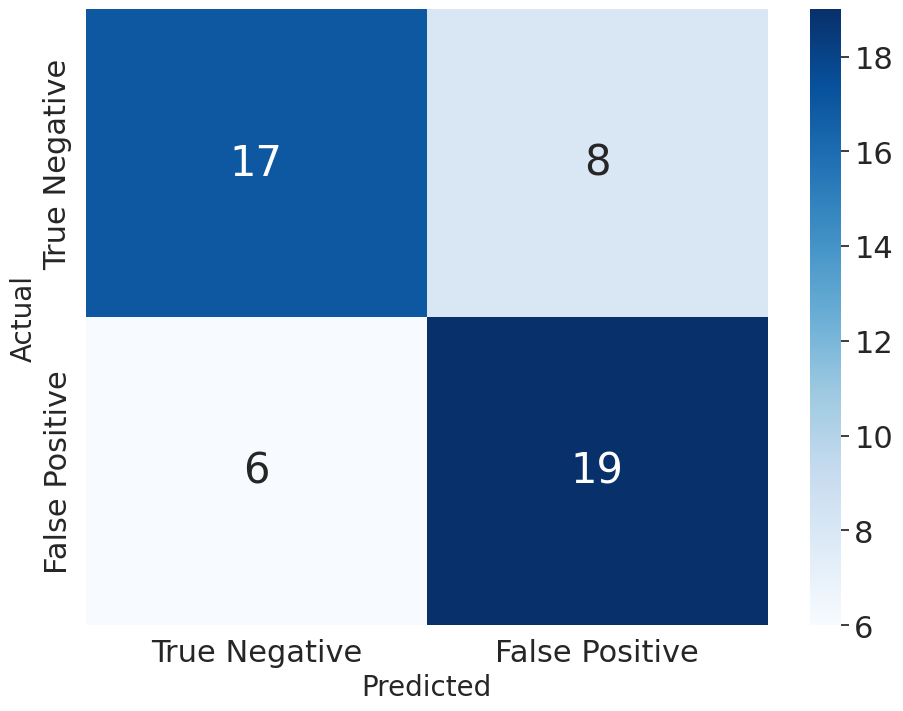

In [33]:
from sklearn.metrics import confusion_matrix

# True for test data
y_true = test_generator.labels

# predicted to binary labels
y_pred = np.round(y_pred)

# confusion matrix
confusion_matrix = confusion_matrix(y_true, y_pred)

# Displaying
import seaborn as sns
from seaborn import heatmap

plt.figure(figsize=(11,8))
sns.set(font_scale=2)

heatmap(confusion_matrix,
        annot=True,
        annot_kws={"size": 30},
        fmt='g',
        cmap='Blues',
        xticklabels=['True Negative', 'False Positive'],
        yticklabels=['True Negative', 'False Positive'])

plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [34]:
# Getting indecies of wrongly classified images
misclassified_indices = np.where(y_true.reshape(-1,1) != y_pred)[0]

# Displaying all wrongly classified images
for i in misclassified_indices:
    image_path = test_generator.filepaths[i]
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.